In [745]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregamento e limpeza dos dados

In [746]:
data = pd.read_csv("data_group5_fixed.csv")

#Retirando inconsistencias na media
data["Media"] = data["Media"].apply(lambda x: x[0:3] if isinstance(x, basestring) else x)
data["Media"] = data["Media"].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else -1)
data["Media"] = data["Media"].apply(lambda x: (x / 10) if x > 10 else x)

data["Cidade"] = data["Cidade"].apply(lambda x:x[:-1] if x and x[-1].isspace() else x)
data["Cidade"] = data["Cidade"].apply(lambda x:x[x.find("Novo Hamburgo"):13] if x.find("Novo Hamburgo") != -1 else x)
data["Cidade"] = data["Cidade"].apply(lambda x:"Canguçu" if x == "Cangucu" else x)

#print(data.loc[[20]])
# data[data['Cidade'] == "Canguçu"]

In [789]:
data.head()

,Curso,Semestre_ingresso,Idade,Cidade,Estado,Trabalha,Forma_ingresso,Cota,Num_disciplinas,Reprovacao,Media
0,Licenciatura em Matemática,161,24,Pelotas,RS,Não,SISU - Ampla concorrência,NaN,25,0,8.9
1,Ciências Econômicas,161,21,Alegrete,RS,Não,SISU - Cota,"L5: independentemente da renda, cursou todo EM...",34,14,4.0
2,Engenharia de Computação,181,18,Pelotas,RS,Não,PAVE - Ampla concorrência,NaN,18,0,7.7
3,Ciência da Computação,171,24,São Paulo,SP,Sim,SISU - Ampla concorrência,NaN,22,4,6.4
4,Engenharia de Computação,191,21,Osório,RS,Não,SISU - Cota,"L1: com renda familiar < ou = 1,5 salários mín...",7,1,8.2


In [748]:
dist = pd.read_csv("distancias_de_pelotas.csv")
dist.head()

,cidade,latitude,longitude,distancia
0,Abadia Dos Dourados,-18.491063,-47.406365,1552.553136
1,Abaetetuba,-1.718060,-48.882500,3346.389498
2,Abaiara,-7.336420,-39.061290,3036.331976
3,Abatia,-23.305297,-50.310253,959.381035
4,Abdon Batista,-27.589810,-51.040230,480.395004


# DISTANCIA DE CASA AFETA A MEDIA?

In [749]:
#

filtered = data[["Media", "Num_disciplinas", "Reprovacao", "Cidade"]]
filtered = filtered[filtered.Media > 0]
#filtered.describe()
#city = filtered.groupby('Cidade')
#city.head()
city = filtered.groupby('Cidade').count()
#city

#filtered['Cidade'].sort_values()

#filtered.groupby('Cidade').count().sort_values('Cidade',ascending=False)

#Tirando Cidade == Rio Grande do sul

In [750]:
city.drop(['Rio Grande do Sul'])
city = city.rename(columns={'Media': 'Num'})
city = city.drop(["Num_disciplinas", "Reprovacao"], axis=1)

In [751]:
ex = city.drop(['Pelotas'])
# ex.plot(kind = 'hist', bins = 20)

In [752]:
# city['Media'] = pd.Series(np.random.randn(len(city['Num'])), index=city.index)
# city["Disc_ap"] = pd.Series(np.random.randn(len(city['Num'])), index=city.index)
# city["Num_rep"] = pd.Series(np.random.randn(len(city['Num'])), index=city.index)
#city["Dist"] = pd.Series(np.random.randn(len(city['Num'])), index=city.index)
#city

In [753]:
city['Nome'] = city.index

dist.groupby('cidade')
dist2 = dist[dist['cidade'].isin(city["Nome"])].dropna()
dist2['Nome'] = dist2['cidade']

dist2.drop("cidade", axis = 1, inplace = True)
dist2.drop("latitude", axis = 1, inplace = True)
dist2.drop("longitude", axis = 1, inplace = True)
dist2

df_merged = pd.merge(dist2, city, on='Nome')
#df_merged

In [754]:
df_nota = filtered.copy()
df_nota

df_nota = df_nota.groupby('Cidade').sum()
df_nota["Pctg_rep"] = (df_nota["Reprovacao"] * 100) / df_nota["Num_disciplinas"]

df_nota["Nome"] = df_nota.index

## RESULTADOS DISTANCIA x DESEMPENHO

### DADOS

In [755]:
df_cidades = pd.merge(df_merged, df_nota, on='Nome')

df_cidades["Media"] = df_cidades["Media"] / df_cidades["Num"]

df_cidades

,distancia,Nome,Num,Media,Num_disciplinas,Reprovacao,Pctg_rep
0,397.013269,Alegrete,1,4.000000,34,14,41.176471
1,2161.657844,Alvorada,1,5.200000,20,4,20.000000
2,3142.726330,Bacabal,1,7.700000,21,1,4.761905
3,174.507091,Bagé,2,8.650000,76,0,0.000000
4,1446.101937,Barbacena,1,3.500000,90,12,13.333333
5,3380.780862,Belém,1,6.800000,41,5,12.195122
6,1540.230421,Betim,1,7.500000,10,4,40.000000
7,1057.261041,Botucatu,1,6.700000,32,6,18.750000
8,113.893563,Camaquã,5,5.840000,175,56,32.000000
9,1113.996711,Campinas,1,7.000000,17,1,5.882353


### Histograma, tirando Pelotas, do Número de observações de cada cidade

[<matplotlib.text.Text at 0x1d5ae080>, <matplotlib.text.Text at 0x1d586358>]

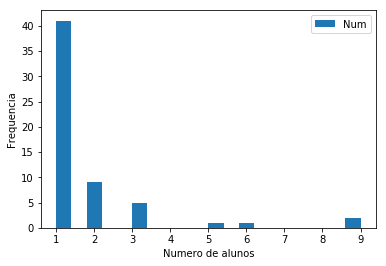

In [756]:
ax = ex.plot(kind = 'hist', bins = 20)
ax.set(xlabel="Numero de alunos", ylabel="Frequencia")

### CORRELACAO ENTRE DISTANCIA E ATRIBUTOS

In [757]:
df_cidades.corr()["distancia"]

distancia          1.000000
Num               -0.176638
Media             -0.073737
Num_disciplinas   -0.164673
Reprovacao        -0.156304
Pctg_rep           0.017501
Name: distancia, dtype: float64

#### SCATTER PLOT PARA VISUALIZAÇÃO DA DISPERSÃO DOS DADOS DA DISTANCIA EM RELAÇÃO À PORCENTAGEM DE REPROVAÇÃO

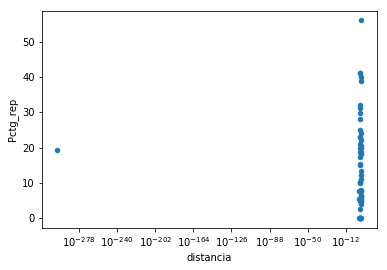

In [758]:
df_cidades.plot(x='distancia', y='Pctg_rep', kind='scatter', logx=True)

#### RETIRANDO PELOTAS DOS DADOS

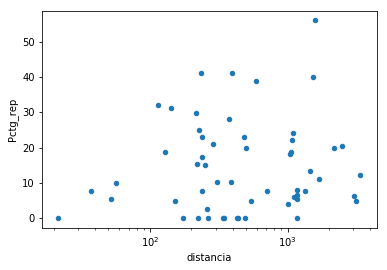

In [759]:
df_cidades[(df_cidades.distancia > 0)].plot(x='distancia', y='Pctg_rep', kind='scatter', logx=True)

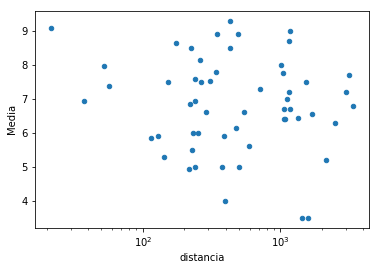

In [760]:
df_cidades[(df_cidades.distancia > 0)].plot(x='distancia', y='Media', kind='scatter', logx=True)

### Hipotese: É de se esperar que a distancia de casa afete negativamente a média, por exemplo, por motivos psicologicos ou financeiros

### CONCLUSAO: Numero de observações é muito baixo para que se possa ter uma resposta sólida. A correlação entre a distância e os demais valores é baixa. Pelo número de observações é dificil tirar uma conclusão do scatter plot sem Pelotas, ele não transparece algum padrão de dispersão que possa ser útil. Sem uma quantidade de dados maior a conclusão é de que a distância não impacta no desempenho do aluno.

In [761]:
# cidade = df_merged.copy()
# nota = 0
# for i in range(0, len(df_merged['Num'])):
#     for j in range(0, len(filtered['Media'])):
#         if(filtered["Cidade"][j] == df_merged["Nome"][i]):
#             nota = nota + (filtered["Media"][j])
    
#     cidade['Media'][i] = nota
#     nota = 0

#     for j in range(0, len(dist['distancia'])):

In [762]:
# df_merged["Media"][12]

In [763]:
# df_merged

In [764]:
# for i in range(0, len(city['Num'])):
#     for j in range(0, len(dist['distancia'])):
# # #     city['Dist'] = dist['distancia'].where
# # #     city['Dist'][i] = dist['distancia'].where(dist['cidade'] == city.index[i])
#          print dist.loc[dist['cidade'] == city.index[i]]
# print dist['distancia'].where(dist['cidade'] == city.index[i])]

# dist2 = dist(drop)


In [765]:
# media = 0
# for i in range(0, len(city['Num'])):
#     city['Media'][i] = filtered['Media'].apply(lambda x: )

# COTA DE ENTRADA 

### Descricao dos dados Cota

In [766]:
df_cota = data.copy()

df_cota['Cota'] = df_cota['Cota'].apply(lambda x: x[0:2] if pd.notnull(x) else "Ampla")
df_cota2 = df_cota[df_cota.Media > 0]
df_cota2.describe()

,Semestre_ingresso,Idade,Num_disciplinas,Reprovacao,Media
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,159.965116,22.110465,30.639535,5.034884,6.705233
std,17.709117,2.908850,15.633532,6.276192,1.642572
min,92.000000,18.000000,0.000000,0.000000,1.500000
25%,151.000000,20.000000,20.000000,1.000000,5.575000
50%,162.000000,21.000000,26.000000,3.000000,6.900000
75%,171.000000,24.000000,39.250000,7.000000,8.000000
max,191.000000,39.000000,100.000000,50.000000,9.500000


In [767]:

# df_cota2.describe()
means = df_cota2.groupby('Cota').mean()
means


,Semestre_ingresso,Idade,Num_disciplinas,Reprovacao,Media
Cota,,,,,
Ampla,155.948454,22.463918,33.927835,5.680412,6.719588
L1,165.833333,21.291667,25.416667,3.666667,6.600000
L2,176.000000,24.000000,17.000000,2.833333,6.866667
L5,160.794118,21.558824,30.235294,4.088235,7.038235
L6,171.272727,21.454545,21.727273,6.454545,5.690909


### Plots Cota

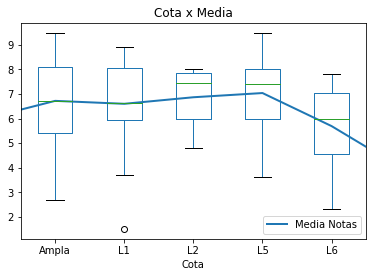

In [768]:
meansList = means["Media"].tolist()
meansList.insert(0,6)
meansList.insert(6,4)

fig, ax = plt.subplots()
ax.plot(meansList, linewidth=2)
ax.legend(["Media Notas"], loc = 4)

# #order= ["50", "100", "250", "500", "1k"]
df_cota2.boxplot(column="Media",by='Cota', ax=ax)
# df.boxplot(column="Media",by='Cota',rot=90, positions=[3, 6, 4, 2, 5, 1], ax=ax)
plt.grid(False)
plt.title("Cota x Media")
plt.suptitle("")
# plt.xticks(rotation=360)
# plt.savefig("qmi.pdf")
plt.show()

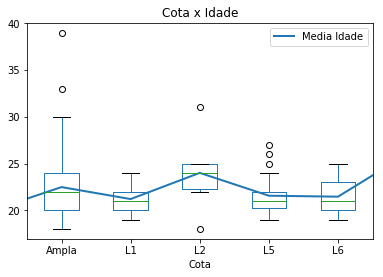

In [769]:
age = df_cota.groupby('Cota').mean()
ageList = age["Idade"].tolist()
ageList.insert(0,20)
ageList.insert(6,26)

fig, ax = plt.subplots()
ax.plot(ageList, linewidth=2)
ax.legend(["Media Idade"])

# #order= ["50", "100", "250", "500", "1k"]
df_cota.boxplot(column="Idade",by='Cota', ax=ax)
# df.boxplot(column="Media",by='Cota',rot=90, positions=[3, 6, 4, 2, 5, 1], ax=ax)
plt.grid(False)
plt.title("Cota x Idade")
plt.suptitle("")
# plt.xticks(rotation=360)
# plt.savefig("qmi.pdf")
plt.show()

### RELAÇÃO COTA: Em ambas a Ampla é o que mais apresenta dispersão nos dados e L2 a menor dispersão, porém não é evidente nenhum padrão entre as informações de renda e cor de pele proveniente das amostras

# Trabalho Influencia no Desempenho?

### Descrição dos dados

In [773]:
df =data.copy()
df2 = df2[df2.Media > 0]

# df2.describe()
df2["Pctg_apro"] = (df2["Reprovacao"] * 100) / df2["Num_disciplinas"]

trab = df2.copy()

trab = trab.groupby("Trabalha").mean()
trab

,Semestre_ingresso,Idade,Num_disciplinas,Reprovacao,Media,Pctg_apro
Trabalha,,,,,,
Não,162.517544,21.754386,28.421053,5.131579,6.533333,18.310733
Sim,154.948276,22.810345,35.000000,4.844828,7.043103,13.901927


### Plots

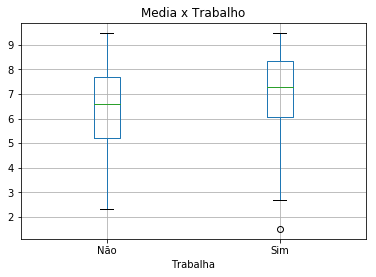

In [780]:
df2.boxplot(column="Media",by='Trabalha')
# df.boxplot(column="Media",by='Cota',rot=90, positions=[3, 6, 4, 2, 5, 1], ax=ax)
#plt.grid(False)
plt.title("Media x Trabalho")
plt.suptitle("")
# plt.xticks(rotation=360)
# plt.savefig("qmi.pdf")
plt.show()

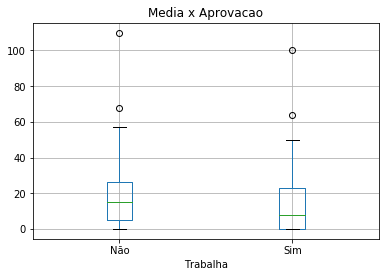

In [782]:
df2.boxplot(column="Pctg_apro",by='Trabalha')
# df.boxplot(column="Media",by='Cota',rot=90, positions=[3, 6, 4, 2, 5, 1], ax=ax)
#plt.grid(False)
plt.title("Media x Aprovacao")
plt.suptitle("")
# plt.xticks(rotation=360)
# plt.savefig("qmi.pdf")
plt.show()



#Removendo outlier de uma pessoa (imbecil) que preencheu que fez 10 disciplinas e reprovou em 11

In [787]:
df2[df2['Pctg_apro'] > 100]

,Curso,Semestre_ingresso,Idade,Cidade,Estado,Trabalha,Forma_ingresso,Cota,Num_disciplinas,Reprovacao,Media,Pctg_apro
71,Engenharia de Computação,171,20,Santa Vitória do Palmar,RS,Não,SISU - Cota,"L6: autodeclarado preto, pardo ou indígena e, ...",10,11,2.3,110.0


### Ao contrário do que se espera, o trabalho não teve um impacto grande sobre o desempenho. A média dos que trabalham foi maior porem a porcentagem de aprovação foi menor, isso pode se um indício de que quem trabalha consegue manter boa media nas cadeiras que aprova, enquanto quem não trabalha pode priorizar só passar sem pensar tanto na nota

# Obviamente as análises realizadas precisam de um número maior de alunos para poderem se confirma. Além de outros pontos/filtragens, como por exemplo, cursos de turno integral favorecem muito menos aqueles que trabalham, ou o pequeno número de alunos que responderam que são de cidades longe de Pelotas